# Outliers detection

First, we are going to use the gaussian curve to make this detection:

In [26]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [27]:
df = pd.read_csv("Nov2Temp.csv")
df

,high,low
0,58,25
1,26,11
2,53,24
3,60,37
4,67,42
...,...,...
113,119,33
114,127,27
115,18,38
116,15,51


<Axes: >

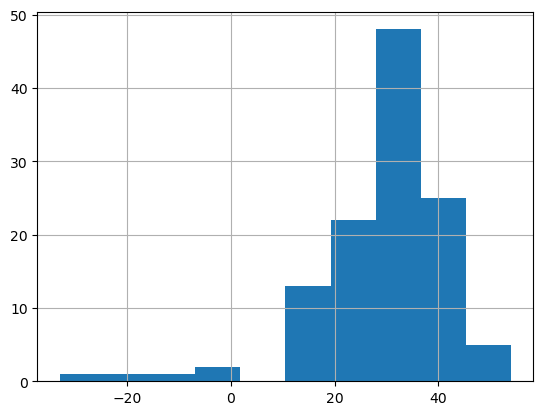

In [28]:
# Data is corresponding (at least a little bit) to a normal distribution
df["low"].hist()

In [29]:
df[(df["low"] < (df["low"].mean() - 3 * df["low"].std())) | (df["low"] > (df["low"].mean() + 3 * df["low"].std()))]

,high,low
109,48,-11
110,43,-21
111,64,-33


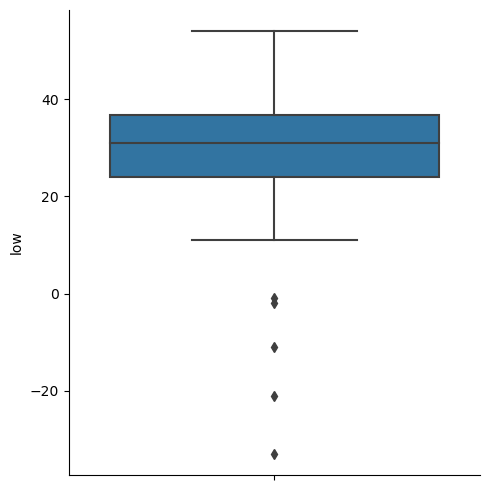

In [30]:
import seaborn as sns
sns.catplot(data = df, y = "low", kind = "box")

Removing the outliers:

In [31]:
df.drop((df[(df["low"] < (df["low"].mean() - 3 * df["low"].std())) | (df["low"] > (df["low"].mean() + 3 * df["low"].std()))]).index, inplace = True)

<Axes: >

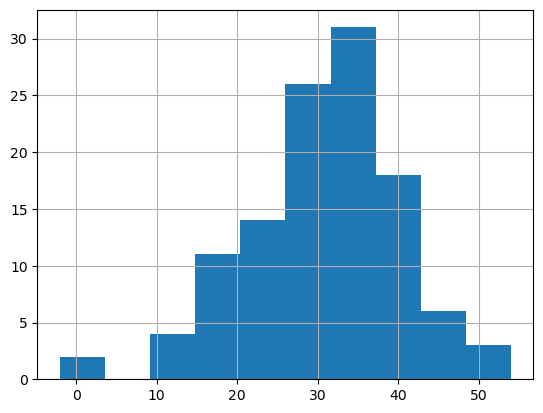

In [32]:
df["low"].hist()

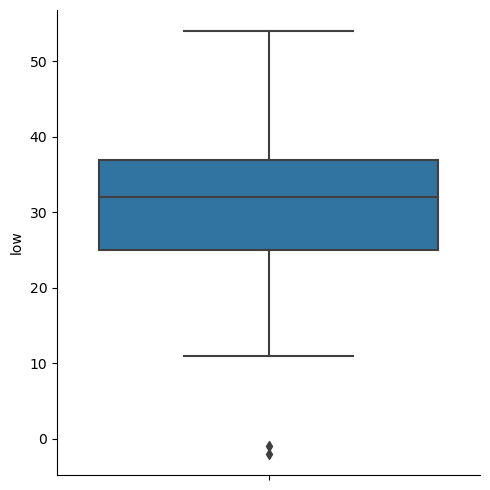

In [33]:
sns.catplot(data = df, y = "low", kind = "box")

Using IQR (Inter Quantile Range)

In [34]:
df = pd.read_csv("Nov2Temp.csv")

In [35]:
df

,high,low
0,58,25
1,26,11
2,53,24
3,60,37
4,67,42
...,...,...
113,119,33
114,127,27
115,18,38
116,15,51


In [38]:
df.describe()

,high,low
count,118.000000,118.000000
mean,56.830508,29.262712
std,17.205796,12.877084
min,15.000000,-33.000000
25%,48.250000,24.000000
50%,57.500000,31.000000
75%,66.750000,36.750000
max,127.000000,54.000000


In [36]:
import matplotlib.pyplot as plt

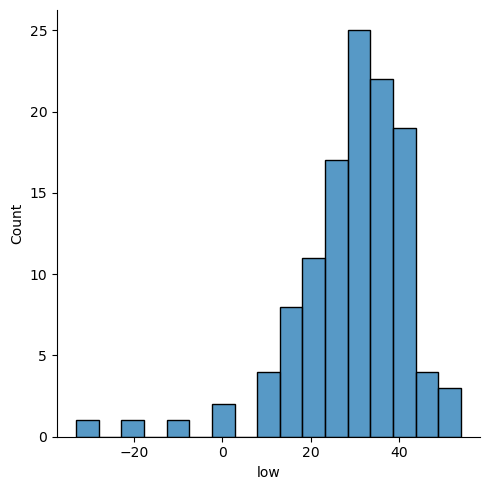

In [40]:
sns.displot(data = df, x = "low", kind = "hist")

{'whiskers': [<matplotlib.lines.Line2D at 0x1779689d0>,
 'caps': [<matplotlib.lines.Line2D at 0x17796a110>,
 'boxes': [<matplotlib.lines.Line2D at 0x177963e50>],
 'medians': [<matplotlib.lines.Line2D at 0x17796b710>],
 'fliers': [<matplotlib.lines.Line2D at 0x1779741d0>],
 'means': []}

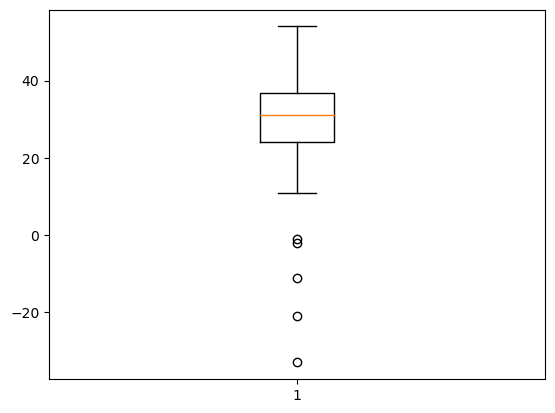

In [37]:
plt.boxplot(df["low"])

In [41]:
IQR = df["low"].quantile(0.75) - df["low"].quantile(0.25)
IQR

12.75

In [44]:
low_limit = df["low"].quantile(0.25) - 1.5 * IQR
low_limit 

4.875

In [45]:
df[df["low"] < low_limit]

,high,low
41,41,-2
79,18,-1
109,48,-11
110,43,-21
111,64,-33


In [46]:
df.drop((df[df["low"] < low_limit]).index, inplace = True)

<Axes: >

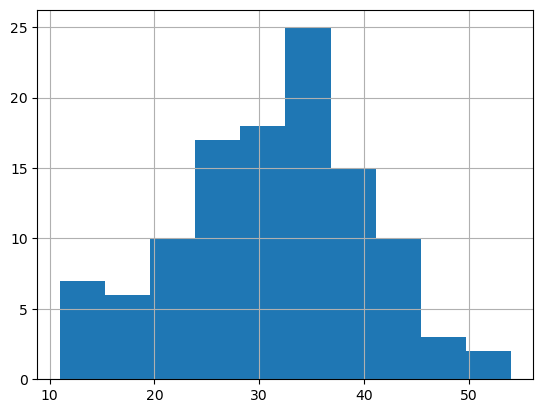

In [48]:
df["low"].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x177a36850>,
 'caps': [<matplotlib.lines.Line2D at 0x177ab5a50>,
 'boxes': [<matplotlib.lines.Line2D at 0x177a37050>],
 'medians': [<matplotlib.lines.Line2D at 0x17753c750>],
 'fliers': [<matplotlib.lines.Line2D at 0x177b00bd0>],
 'means': []}

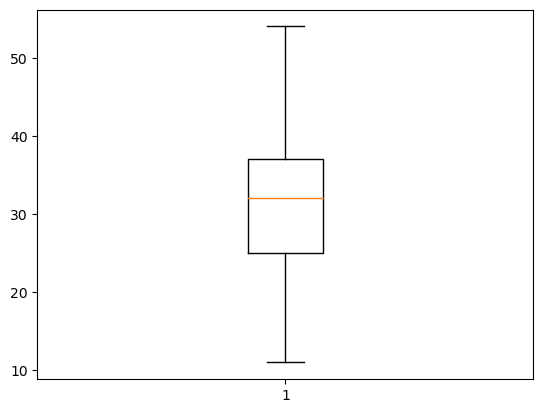

In [49]:
plt.boxplot(df["low"])

Here, we are using just the lower limit as there is not a single outlier beyond the upper limit